# Exploración Avanzada del Dataset Clínico

In [3]:
# Librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Carga del dataset
df = pd.read_csv('../DataWarehouse/data.csv')
df.head()

,sample,id,disease_type,case_id,submitter_id,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,ethnicity.demographic,...,sample_type_id.samples,tumor_descriptor.samples,sample_id.samples,sample_type.samples,preservation_method.samples,specimen_type.samples,is_ffpe.samples,tissue_type.samples,tipo_cancer_TCGA,tipo_cancer_general
0,TCGA-B0-5695-01A,fb9bafa5-7133-4955-8156-4eb6763dc8e1,Adenomas and Adenocarcinomas,fb9bafa5-7133-4955-8156-4eb6763dc8e1,TCGA-B0-5695,Kidney,Not Reported,white,female,not hispanic or latino,...,1,Primary,86e4862c-7405-40b5-b73f-be0c6c52ea6d,Primary Tumor,Unknown,Unknown,False,Tumor,KIRC,Riñón
1,TCGA-BP-4807-01A,33cf0893-0411-4758-aa90-602bfedf0850,Adenomas and Adenocarcinomas,33cf0893-0411-4758-aa90-602bfedf0850,TCGA-BP-4807,Kidney,Not Reported,white,male,not reported,...,1,Primary,26307437-2f30-4647-81ac-f6bae5be6113,Primary Tumor,Unknown,Unknown,False,Tumor,KIRC,Riñón
2,TCGA-BP-4807-11A,33cf0893-0411-4758-aa90-602bfedf0850,Adenomas and Adenocarcinomas,33cf0893-0411-4758-aa90-602bfedf0850,TCGA-BP-4807,Kidney,Not Reported,white,male,not reported,...,11,Not Applicable,6a8ad307-fada-432d-a223-8d9780c4eccc,Solid Tissue Normal,Unknown,Solid Tissue,False,Normal,KIRC,Riñón
3,TCGA-BP-4995-01A,9245a557-01ea-4446-b9e9-313f6ab18834,Adenomas and Adenocarcinomas,9245a557-01ea-4446-b9e9-313f6ab18834,TCGA-BP-4995,Kidney,Not Reported,white,male,not hispanic or latino,...,1,Primary,5cd539b8-90bf-4465-826f-73269ea2e802,Primary Tumor,Unknown,Unknown,False,Tumor,KIRC,Riñón
4,TCGA-BP-4995-11A,9245a557-01ea-4446-b9e9-313f6ab18834,Adenomas and Adenocarcinomas,9245a557-01ea-4446-b9e9-313f6ab18834,TCGA-BP-4995,Kidney,Not Reported,white,male,not hispanic or latino,...,11,Not Applicable,8b6e49fe-5470-476d-9695-0caee2896d66,Solid Tissue Normal,Unknown,Solid Tissue,False,Normal,KIRC,Riñón


## 1. PCA - Reducción de Dimensionalidad

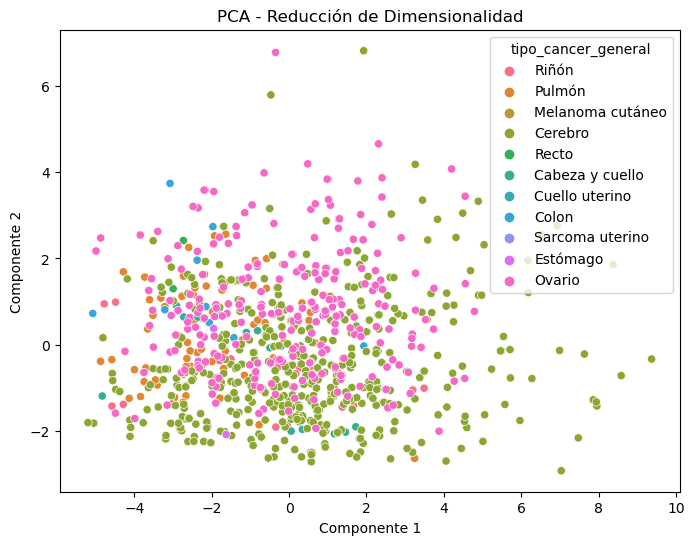

In [6]:
numeric_data = df.select_dtypes(include=[np.number]).dropna()
scaled = StandardScaler().fit_transform(numeric_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df.loc[numeric_data.index, 'tipo_cancer_general'])
plt.title("PCA - Reducción de Dimensionalidad")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

## 2. Agrupación Jerárquica de Variables Categóricas

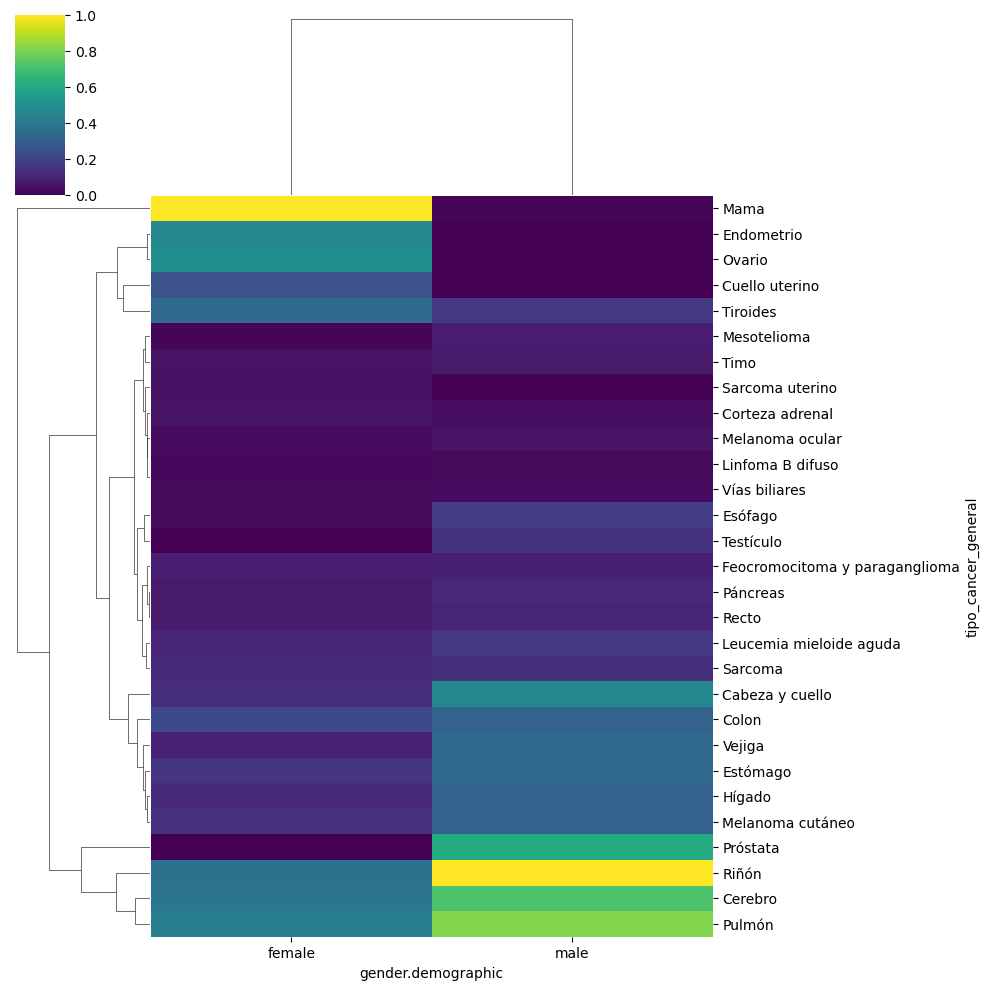

In [7]:
pivot = pd.crosstab(df['tipo_cancer_general'], df['gender.demographic'])
sns.clustermap(pivot, cmap="viridis", standard_scale=1)

## 3. Análisis Multivariado con Pairplot

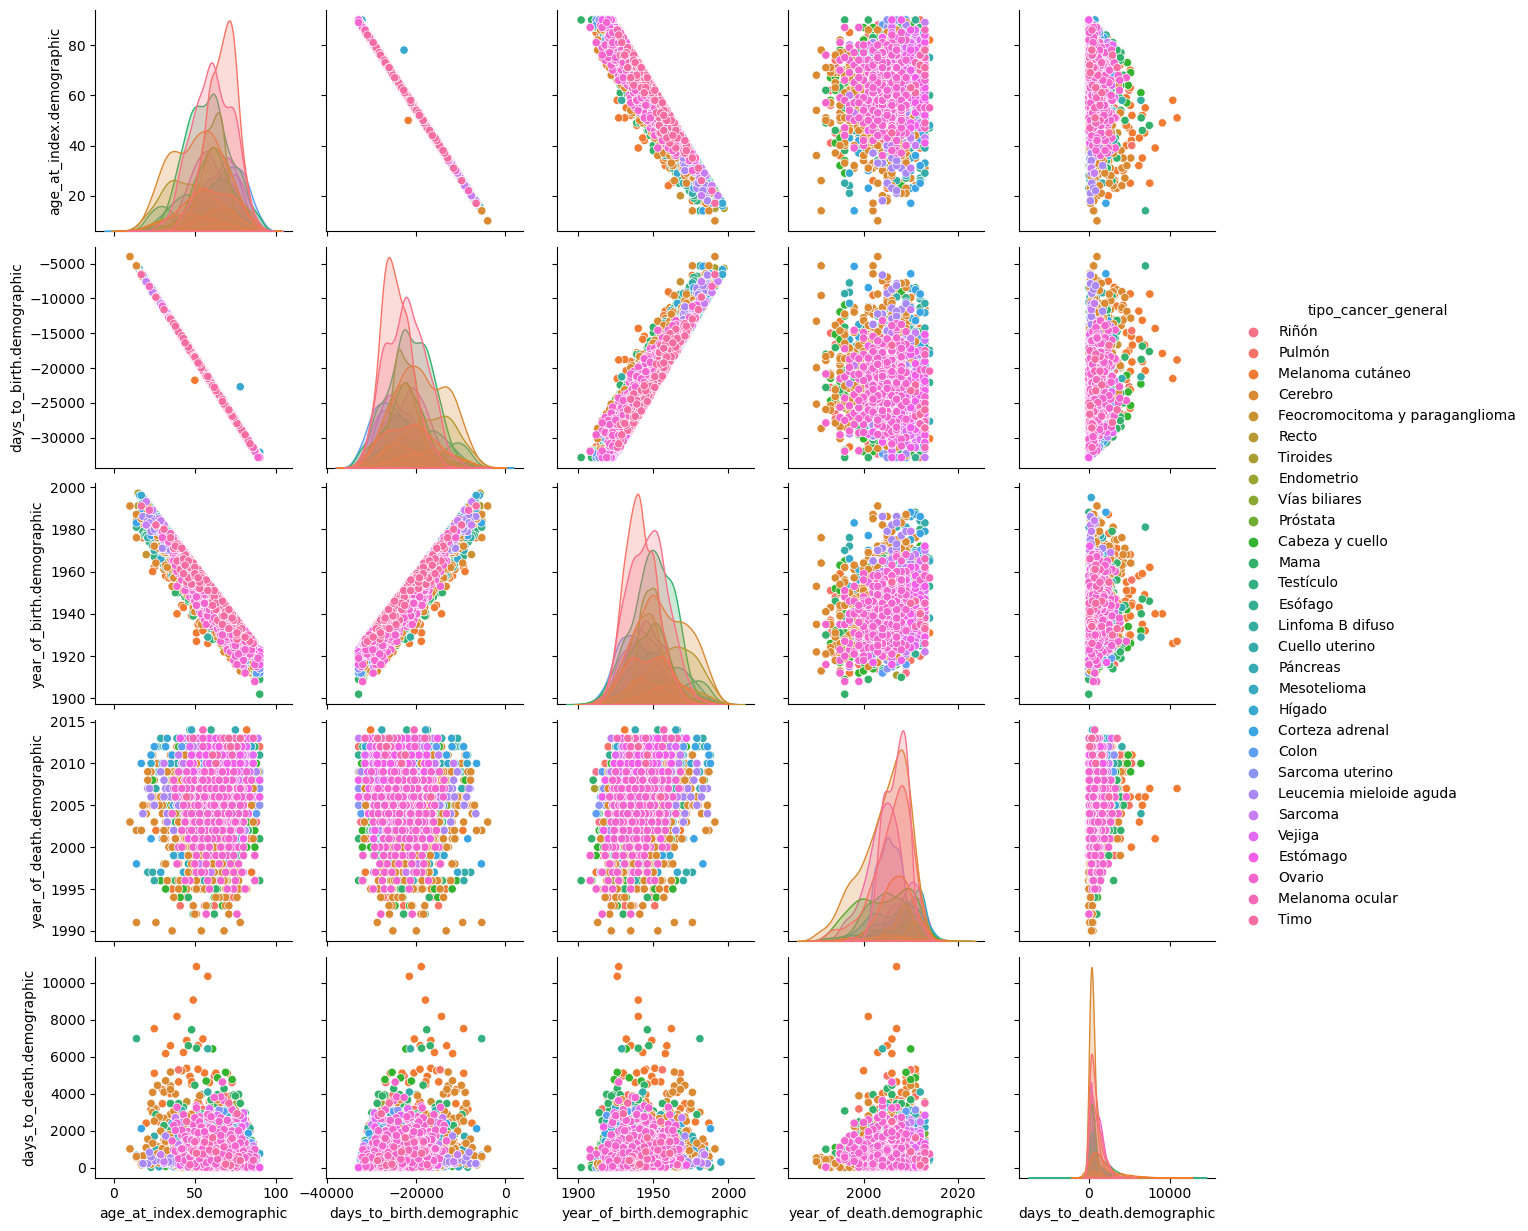

In [8]:
numeric_cols = df.select_dtypes(include=np.number).columns[:5]
sns.pairplot(df, hue='tipo_cancer_general', vars=numeric_cols)

## 4. Outliers por Clase de Cáncer

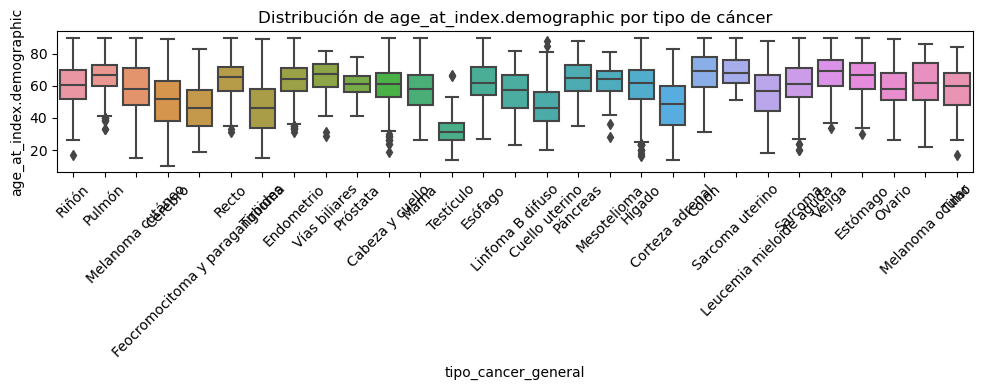

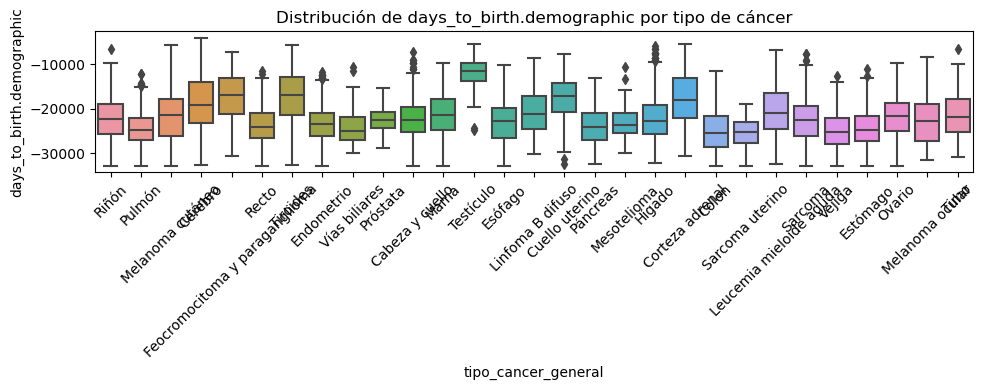

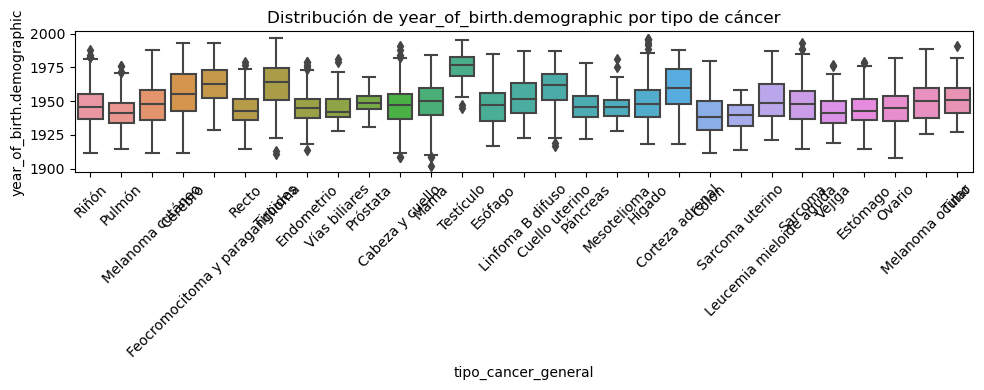

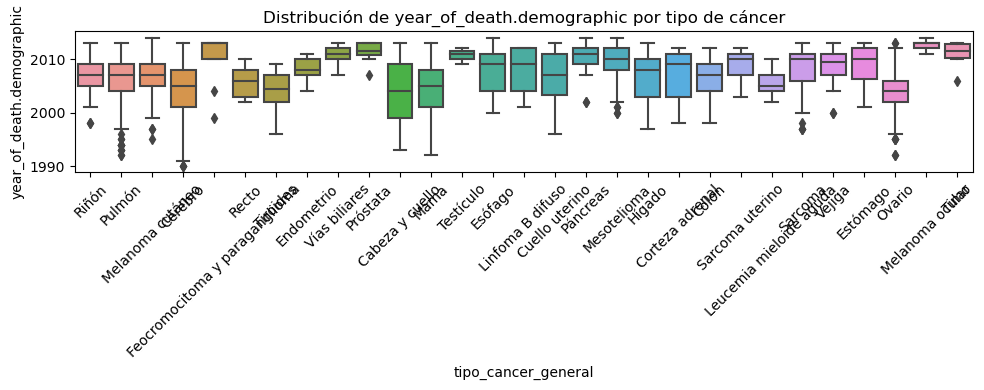

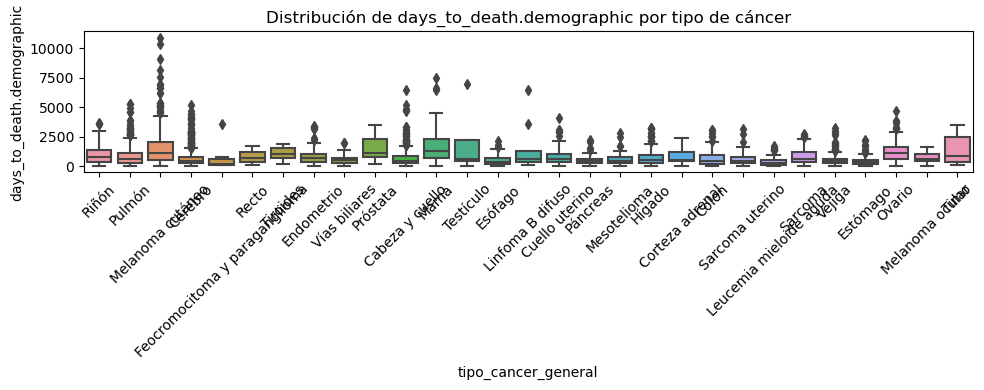

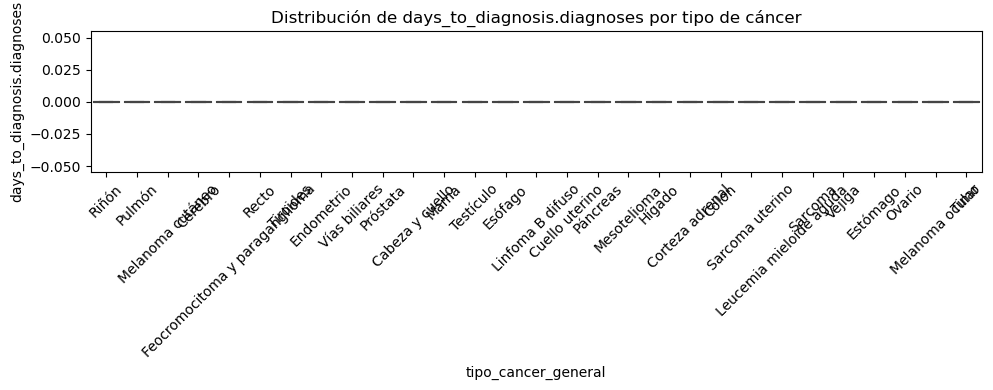

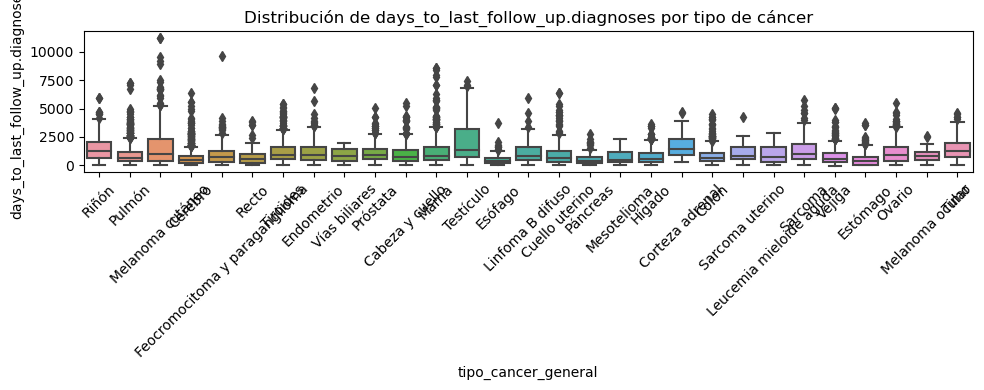

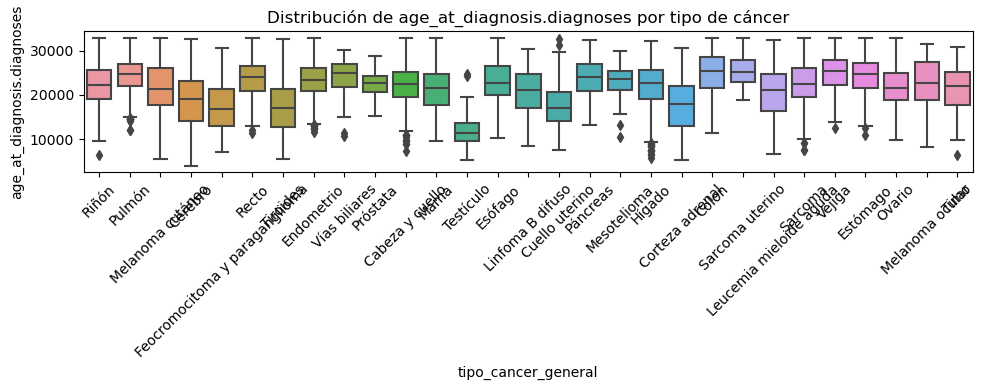

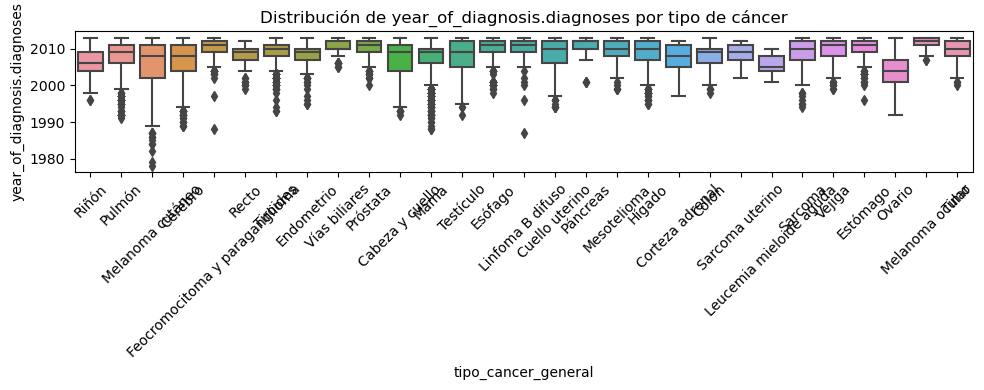

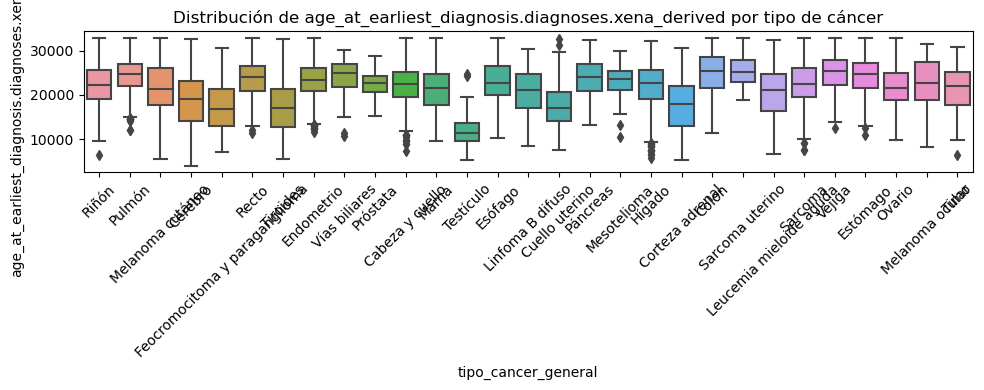

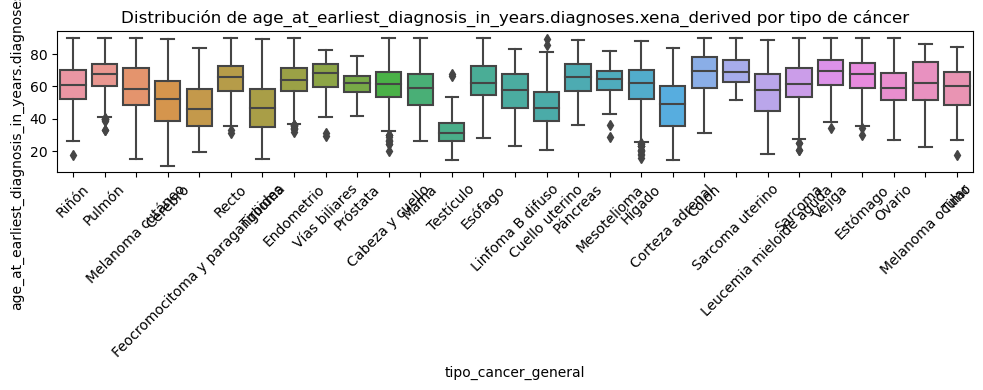

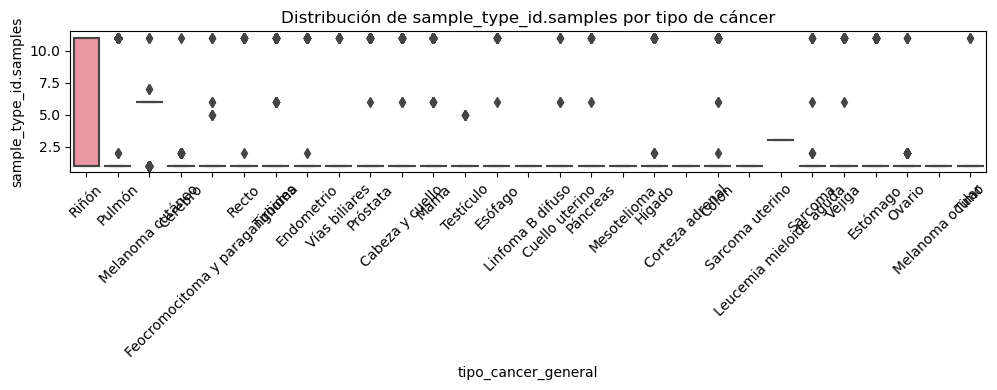

In [9]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x='tipo_cancer_general', y=col)
    plt.title(f'Distribución de {col} por tipo de cáncer')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()